                                           Image Processing 5 Hewan Mamalia

                                                       Kelompok 1 
                                                      Kelas A1 2021
##### Anggota Kelompok :

##### Bayu Abdurosyid - 2109106003
##### Alif Maulana Setyawan  - 2109106002
##### Ananta Yusra Putra.A - 2109106024

link Dataset : <a href="https://www.kaggle.com/datasets/shiv28/animal-5-mammal">Animal -5 Mammal</a>

- Install package dibawah ini, yang akan digunakan untuk melakukan split folder yang akan digunakan untuk folder train dan validation

In [21]:
!pip install split_folders


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Library Utama

In [22]:
import tensorflow as tf

In [23]:
# Panggil Library untuk split
import splitfolders

#### Membuat Direktori Untuk Membaca Dataset

In [24]:
dir = 'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/dataset'

#### Spliting Folder 80% training 20% validasi

- Hanya di gunakan sekali, jika sudah dilakukan spliting folder maka code ini tidak perlu di jalankan lagi.

In [25]:
splitfolders.ratio(dir, output = 'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-', ratio = (.8, .2))

#### Membuat Variabel Untuk Menentukan Resolusi Gambar

In [26]:
# Resolusi/dimensi Width (w), high (h)
w = 150
h = 150

#### Library OS

In [27]:
import os

Digunakan untuk :

- scandir = Mengakses semua file dan folder yang ada di lokasi yang ditentukan
- is_file = Untuk mengetahui apakah jenis objek tersebut berupa file atau direktori.

### Diagram Bar

- Digunakan Untuk Melihat Jumlah Data Image

In [28]:
elephant = 0
horse = 0
lion = 0
cat = 0
dog = 0

array =  [ 
          'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/dataset/ELEPHANT', 
          'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/dataset/HORSE', 
          'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/dataset/LION', 
          'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/dataset/cat', 
          'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/dataset/dog'
          ]

for path in os.scandir(array[0]):
  if path.is_file():
    elephant += 1
for path in os.scandir(array[1]):
  if path.is_file():
    horse += 1
for path in os.scandir(array[2]):
  if path.is_file():
    lion += 1
for path in os.scandir(array[3]):
  if path.is_file():
    cat += 1
for path in os.scandir(array[4]):
  if path.is_file():
    dog += 1

print('file count:', elephant)
print('file count:', horse)
print('file count:', lion)
print('file count:', cat)
print('file count:', dog)

animal = ['elephant', 'horse', 'lion', 'cat', 'dog']
count = [elephant, horse, lion, cat, dog]

file count: 3039
file count: 3009
file count: 2984
file count: 3037
file count: 2927


#### Import Matplotlib

In [29]:
import matplotlib.pyplot as plt

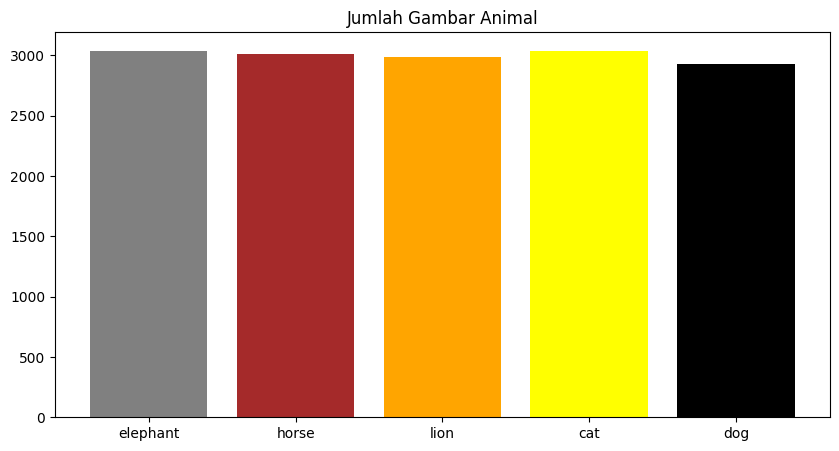

In [30]:
x = animal
y = count

plt.figure(figsize = (10,5))
plt.bar(x, y, color=['gray', 'brown', 'orange', 'yellow', 'black'])
plt.title("Jumlah Gambar Animal")
plt.show()

#### Membuat Class Name

In [31]:
class_names = ['elephant', 'horse', 'lion', 'cat', 'dog']

### Analisis Sebelum Augmentasi

- Preprocessing

datagenbefore digunakan sebagai metode awal augmentasi yang akan digunakan dalam train_before <br>
dan train_before digunakan sebagai augmentasi yang akan digunakan pada data

- rescale = mengubah ukuran gambar
- class_mode = metode pemilihan klasifikasi
- subset = menentukan penggunaan data
- target_size = dimensi dari image yang akan digunakan dalam proses
- batch_size = banyaknya image yang akan dimasukan dalam setiap step

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenbefore = ImageDataGenerator(
    rescale = 1./255
)

train_before = datagenbefore.flow_from_directory(
    'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/train',
    class_mode = 'categorical',
    subset = 'training',
    target_size = (w, h),
    batch_size = 256
)

Found 11995 images belonging to 5 classes.


#### Visualisasi Sebelum Augmentasi

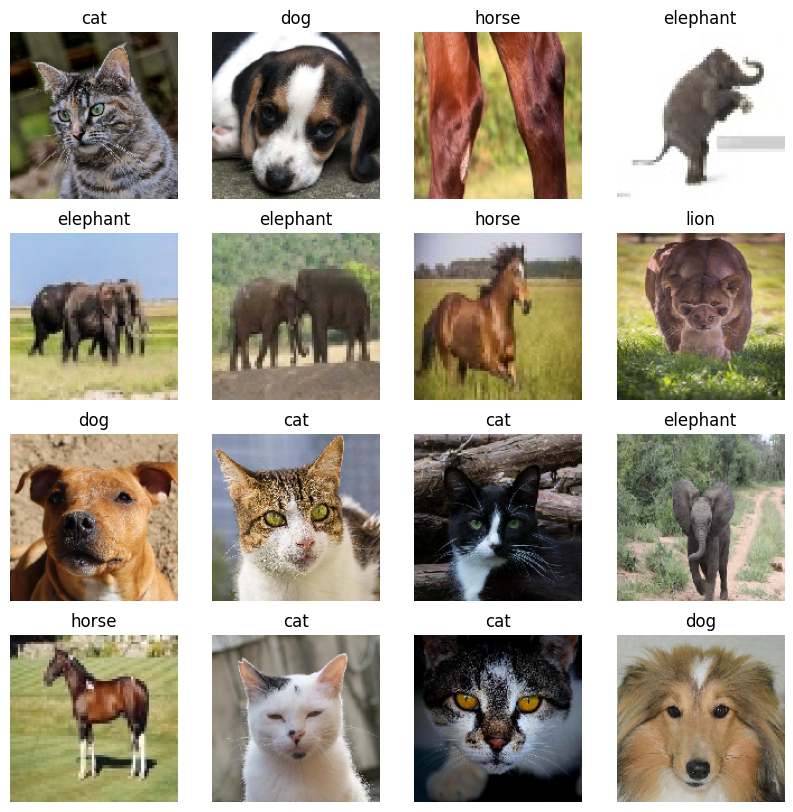

In [35]:
plt.figure(figsize=(10, 10))

images, labels = train_before.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_before[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

# Augmentasi Gambar

In [34]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.15,
)


In [36]:
w = 150
h = 150

train_dataset = datagen.flow_from_directory(
    'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/train',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

validation_dataset = datagen.flow_from_directory(
    'D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/val',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)


Found 11995 images belonging to 5 classes.
Found 3000 images belonging to 5 classes.


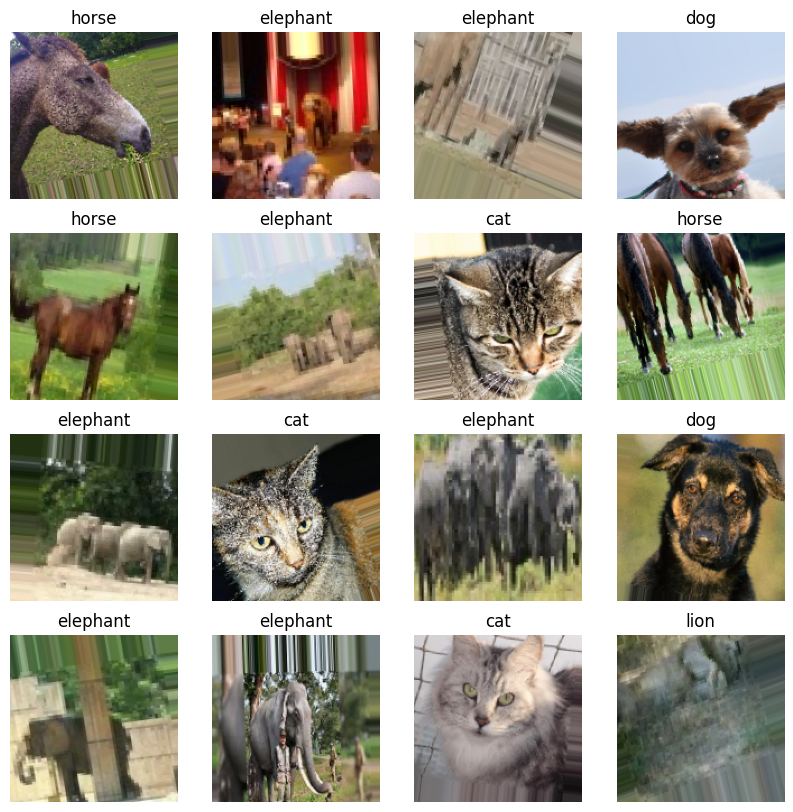

In [37]:
plt.figure(figsize=(10, 10))

images, labels = train_dataset.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_dataset[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

In [38]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential(
    [
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(w, h, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')
    ]
)

In [39]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [40]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epocj, logs = None):
    if (logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print('Akurasi telah mencapai 95%!')
      self.model.stop_training = True

In [41]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    validation_steps = 5,
    epochs = 1,
    callbacks = [callback()]    
)

47/47 [==============================] - 291s 6s/step - loss: 1.5710 - accuracy: 0.2919 - val_loss: 1.5257 - val_accuracy: 0.3516


In [42]:
model.save('gfgModel.h5')
print('Model Saved!')

Model Saved!


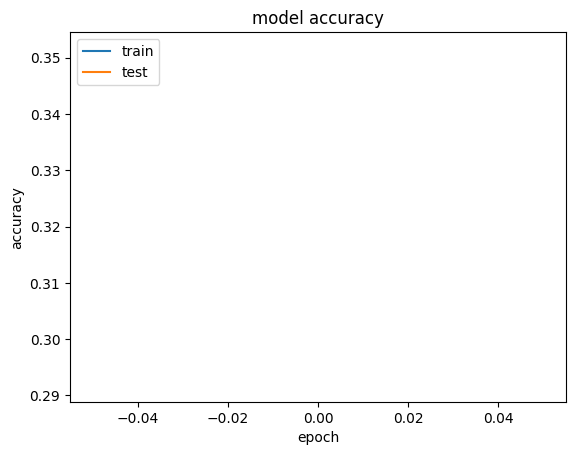

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

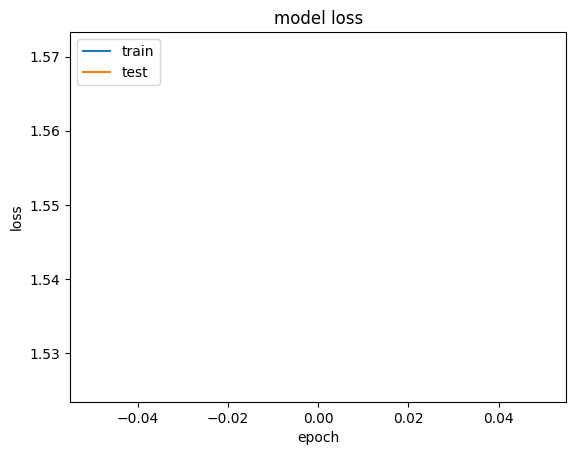

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [45]:
model.evaluate(validation_dataset)

12/12 [==============================] - 26s 2s/step - loss: 1.5249 - accuracy: 0.3540


[1.5248746871948242, 0.3540000021457672]

In [47]:
new_model = tf.keras.models.load_model('D:/UNMUL/vscode/Kelompok1-A1_PA-KB-/gfgModel.h5')

1/1 [==============================] - 0s 23ms/step
lion


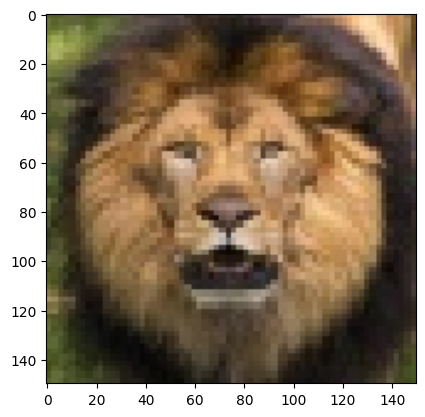

In [53]:
import numpy as py
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

dir = 'D:/UNMUL/vscode/PAKBBB/val/LION/J2ETSAO5X5BH.jpg'

img = image.load_img(dir, target_size = (w, h))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = py.expand_dims(x, axis = 0)

img = utils.load_img(
    dir, target_size = (w, h)
)

img_array = utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("{}" .format(class_names[py.argmax(score)]))